In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


(50000, 28, 28) (50000,)


In [2]:
import numpy as np
import tensorflow as tf
import time

In [3]:
#some gloabel parameters
ntrains = X_train.shape[0]
ntest = X_test.shape[0]
train_index = np.arange(ntrains)
nepoch = 100
batch_size = 256
nbatch= int(50000/batch_size)
image_x,image_y = X_train[0].shape
#number of hidden unit
nhidden=50
nclass =10
#use for regulize
beta = 0.1

In [4]:
#tf.reshape seems not accept [None,-1], which means we need rehshape
# the image to 1-D array before put into the tensor
input_x = tf.placeholder('float32',shape=(None,image_x*image_y))
# we have 10 classes, the length of one hot vector is 10
input_y = tf.placeholder('float32',shape = [None,nclass])

In [5]:
#create the hidden layer with 50 hidden units shape: (image_x*image_y,nhidden)
#random to -0.5 to 0.5, random from 0 to 1 can easily run into local minimum
hidden_layer0 = tf.Variable(initial_value=np.random.rand(image_x*image_y,nhidden)-0.5,dtype='float32')
hidden_bias0 = tf.Variable(initial_value=np.zeros((1,nhidden),dtype='float32'))
#create output layer with the shape (nclass,nhidden), 10 is the number of class 
# nhidden is the row of  previous layer
output_layer = tf.Variable(initial_value=np.random.rand(nhidden,nclass)-0.5,dtype='float32')
output_bias = tf.Variable(initial_value=np.zeros((1,nclass),dtype='float32'))


In [6]:
# do some mathematic to get the predict value
# we take the example as (1,image_x*image_y)
# not column vector
#shape of hidden_value0 : (None,nhidden)
#shape of output_value :(None,nclass)
hidden_value0 = tf.nn.sigmoid(tf.matmul(input_x,hidden_layer0)+hidden_bias0)
#output_value = tf.exp(tf.matmul(hidden_value0,output_layer)+output_bias)
#use softmax version in tenser flow
output_value = tf.matmul(hidden_value0,output_layer)+output_bias
#-1 is the last axis
predict_y = tf.nn.softmax(logits=output_value)

In [7]:
#loss function, need change the y to one hot vector
#create placeholder for the y_train

#use the tensorflow loss 
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_value,labels = input_y))
#add regulizer
regu = tf.reduce_mean(hidden_layer0**2) + tf.reduce_mean(hidden_bias0**2)
regu += tf.reduce_mean(output_layer**2) + tf.reduce_mean(output_bias**2)

loss_regu = loss + beta*regu

In [8]:
#optimiser AdamOptimizer works better than momentum
optimizer = tf.train.AdamOptimizer().minimize(loss_regu)

In [9]:
#initailize
init = tf.global_variables_initializer()
#create a session
sess = tf.Session()
sess.run(init)

Loss for train: 0.705699
loss for test: 0.658893
accuracy test: 0.8552
accuracy train: 0.84765625
Loss for train: 0.420688
loss for test: 0.433195
accuracy test: 0.8946
accuracy train: 0.9140625
Loss for train: 0.360866
loss for test: 0.350959
accuracy test: 0.9112
accuracy train: 0.91015625
Loss for train: 0.32071
loss for test: 0.307416
accuracy test: 0.9201
accuracy train: 0.90234375
Loss for train: 0.3471
loss for test: 0.279043
accuracy test: 0.9263
accuracy train: 0.8984375
Loss for train: 0.23174
loss for test: 0.258231
accuracy test: 0.9288
accuracy train: 0.9296875
Loss for train: 0.225381
loss for test: 0.243029
accuracy test: 0.9333
accuracy train: 0.94140625
Loss for train: 0.228159
loss for test: 0.23077
accuracy test: 0.9363
accuracy train: 0.93359375
Loss for train: 0.24718
loss for test: 0.220764
accuracy test: 0.9398
accuracy train: 0.92578125
Loss for train: 0.158886
loss for test: 0.211313
accuracy test: 0.942
accuracy train: 0.9609375
Loss for train: 0.218077
loss f

Loss for train: 0.0502879
loss for test: 0.110759
accuracy test: 0.9673
accuracy train: 0.9921875
Loss for train: 0.0726146
loss for test: 0.110181
accuracy test: 0.9679
accuracy train: 0.98046875
Loss for train: 0.0658436
loss for test: 0.111324
accuracy test: 0.9673
accuracy train: 0.98828125
Loss for train: 0.0767434
loss for test: 0.109745
accuracy test: 0.9679
accuracy train: 0.9765625
Loss for train: 0.0441372
loss for test: 0.10979
accuracy test: 0.9682
accuracy train: 0.9921875
Loss for train: 0.0751604
loss for test: 0.109838
accuracy test: 0.967
accuracy train: 0.98046875
Loss for train: 0.0446149
loss for test: 0.109852
accuracy test: 0.9673
accuracy train: 0.9921875
Loss for train: 0.0878269
loss for test: 0.110285
accuracy test: 0.9677
accuracy train: 0.98828125
Loss for train: 0.0472768
loss for test: 0.109933
accuracy test: 0.967
accuracy train: 0.9921875
Loss for train: 0.0628948
loss for test: 0.110513
accuracy test: 0.967
accuracy train: 0.98828125
Loss for train: 0.0

Text(0,0.5,'loss test')

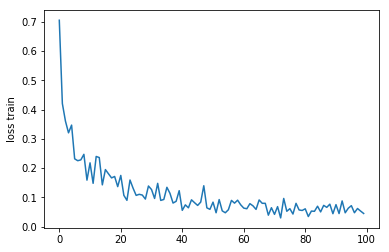

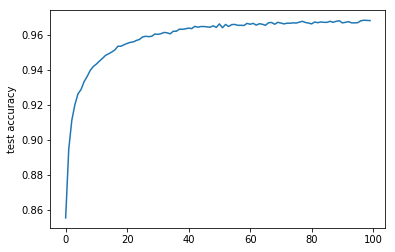

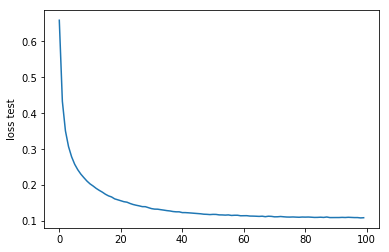

In [10]:
#run the tensor
start_time = time.time()

loss_train_list = []
loss_test_list = []
acc_test_list=[]
for i in range(nepoch):
    # we should reorder the train list for each
    #epoch. This will make the minibatch
    #we got more close to the data distribution
    np.random.shuffle(train_index)
    for j in range(nbatch):
        #not the last minibatch
        low = j*batch_size
        up = (j+1)*batch_size;
        #last minibatch
        #if j >= batch_size-1:
        #    up = ntrains
        batch_x = X_train[train_index[low:up]].reshape(up-low,-1)
        #create one hot 
        batch_y = np.eye(10)[y_train[train_index[low:up]]]
        #print(batch_y.shape)
        #start train
        sess.run(optimizer,feed_dict={input_x:batch_x,input_y:batch_y})
        if j == nbatch -1:
            loss_valule_train = sess.run(loss,feed_dict={input_x:batch_x,input_y:batch_y})
            loss_value_test = sess.run(loss,feed_dict={input_x:X_test.reshape(X_test.shape[0],-1),input_y:np.eye(10)[y_test]})
            predict_value = np.argmax(sess.run(predict_y,feed_dict={input_x:X_test.reshape(X_test.shape[0],-1)}),axis=-1)
            accuracy = np.mean(np.abs(np.subtract(predict_value,y_test)) < 0.1)
            predict_value_train = np.argmax(sess.run(predict_y,feed_dict={input_x:batch_x.reshape(up-low,-1)}),axis=-1)
            accuracy_train = np.mean(np.abs(np.subtract(predict_value_train,y_train[train_index[low:up]])) < 0.1)
            loss_train_list.append(loss_valule_train)
            loss_test_list.append(loss_value_test)
            acc_test_list.append(accuracy)
            print("Loss for train: "+str(loss_valule_train))
            print("loss for test: "+str(loss_value_test))
            print("accuracy test: " + str(accuracy))
            print("accuracy train: "+ str(accuracy_train))

print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(1)
plt.plot(loss_train_list)
plt.ylabel("loss train")
plt.figure(2)
plt.plot(acc_test_list)
plt.ylabel("test accuracy")
plt.figure(3)
plt.plot(loss_test_list)
plt.ylabel("loss test")